### loading in necessary packages

In [35]:
import pandas as pd
import numpy as np
from collections import Counter
from matplotlib import pyplot as plt
from tqdm import tqdm

data_path = '/Users/ruoyangzhang/Documents/PythonWorkingDirectory/news_exploration/Data/'

In [6]:
data_1 = pd.read_csv(data_path+'all-the-news/articles1.csv')

In [7]:
data_1 = data_1.drop(['Unnamed: 0'], axis = 1)

In [8]:
len(data_1)

50000

In [9]:
data_1.head()

,id,title,publication,author,date,year,month,url,content
0,17283,House Republicans Fret About Winning Their Hea...,New York Times,Carl Hulse,2016-12-31,2016.0,12.0,NaN,WASHINGTON — Congressional Republicans have...
1,17284,Rift Between Officers and Residents as Killing...,New York Times,Benjamin Mueller and Al Baker,2017-06-19,2017.0,6.0,NaN,"After the bullet shells get counted, the blood..."
2,17285,"Tyrus Wong, ‘Bambi’ Artist Thwarted by Racial ...",New York Times,Margalit Fox,2017-01-06,2017.0,1.0,NaN,"When Walt Disney’s “Bambi” opened in 1942, cri..."
3,17286,"Among Deaths in 2016, a Heavy Toll in Pop Musi...",New York Times,William McDonald,2017-04-10,2017.0,4.0,NaN,"Death may be the great equalizer, but it isn’t..."
4,17287,Kim Jong-un Says North Korea Is Preparing to T...,New York Times,Choe Sang-Hun,2017-01-02,2017.0,1.0,NaN,"SEOUL, South Korea — North Korea’s leader, ..."


the dataset seemed rather simple, we may not be able to do any classification tasks on these, but we can surely test word2vec on them

In [12]:
# missing values
data_1.isnull().sum()

id                 0
title              0
publication        0
author          6306
date               0
year               0
month              0
url            50000
content            0
dtype: int64

it seems as though the dataset is rather clean, we do not have many missing values other than the 'author column' wwhich over just over 10% missing and the URL column, which remains largely irrelevant for the purpose of this project

We'll take a random look around the text it self

In [18]:
for article in np.random.choice(data_1.content, 5):
    print(article)
    print('------------------------------------------------------')
    print(' ')

’  ’ ”   WASHINGTON, DC  —   As the world adjusts to America’s  uncertainties   about what policies Donald Trump will pursue  —   toward North Korea   in particular  —   remain. ” ’   ”Trying to predict President Trump’’s policy toward Asia, or any   global region for that matter, is difficult if not   impossible,” Bruce Klingner, senior research fellow of   Northeast Asia at the Heritage Foundation, told Business Insider. ’ ’   ”We are in uncharted territory because Trump has not articulated   an Asian policy nor does he even have an identifiable cadre of   Asian advisors,” Klingner added. ’ ’   Echoing that sentiment, David Straub, former State   Department Korea director and associate director of the   Korea Program at Stanford University, told Business   Insider that Trump knows ”next to nothing” about the region. ’ ’   ”He didn’’t say very much about North Korea during the campaign,   and what he did say was incoherent,” Straub told   Business Insider. ’ ”   Notably, while on the 

We ran the above lines a few times and based on initial inspection, the text data also seems incredibly clean (this is great)

We take a look at the publication date

In [36]:
counter_obj = Counter(data_1.date)
new_counter_obj = {}
for k,v in tqdm(counter_obj.items()):
    if k[:4] not in new_counter_obj.keys():
        new_counter_obj[k[:4]] = v
    else:
        new_counter_obj[k[:4]] += v

100%|██████████| 983/983 [00:00<00:00, 656633.35it/s]


In [37]:
new_counter_obj

{'2011': 1,
 '2012': 26,
 '2013': 212,
 '2014': 76,
 '2015': 3326,
 '2016': 28451,
 '2017': 17908}

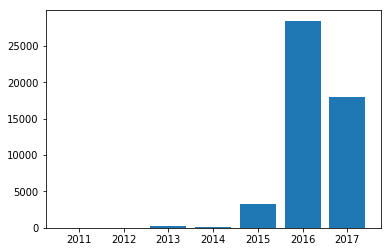

In [42]:
sorted_dates = sorted([key[:4] for key in new_counter_obj.keys()])
plt.bar(range(len(new_counter_obj)), [new_counter_obj[key] for key in sorted_dates], align = 'center') 
plt.xticks(range(len(new_counter_obj)), sorted_dates)
plt.show()

it seems as though we can perhaps look at data from 2016 and 2017 for the purpose of the project, since we aim to repartition the date into smaller time intervals (such as month)

for the sake of complete inspection, we look at the other 2 sets

In [48]:
def inspect_yearly_distribution(data):
    counter_obj = Counter(data.date)
    new_counter_obj = {}
    for k,v in tqdm(counter_obj.items()):
        if k[:4] not in new_counter_obj.keys():
            new_counter_obj[k[:4]] = v
        else:
            new_counter_obj[k[:4]] += v
        
    sorted_dates = sorted([key[:4] for key in new_counter_obj.keys()])
    plt.bar(range(len(new_counter_obj)), [new_counter_obj[key] for key in sorted_dates], align = 'center') 
    plt.xticks(range(len(new_counter_obj)), sorted_dates)
    plt.show()

In [50]:
data_2 = pd.read_csv(data_path+'all-the-news/articles2.csv')
data_3 = pd.read_csv(data_path+'all-the-news/articles3.csv')

 23%|██▎       | 135/598 [00:30<01:44,  4.44it/s]

In [51]:
data_2 = data_2.drop(['Unnamed: 0'], axis = 1)
data_3 = data_3.drop(['Unnamed: 0'], axis = 1)

In [53]:
data_2.isnull().sum()

id                0
title             1
publication       0
author         8598
date           2626
year           2626
month          2626
url            7011
content           0
dtype: int64

In [54]:
data_3.isnull().sum()

id               0
title            1
publication      0
author         972
date            15
year            15
month           15
url              0
content          0
dtype: int64

We seemed to have quite a fez missing dates in the second set, we drop the missing values using the 'date' column for both datasets

In [69]:
data_2 = data_2.dropna(subset=['date']).reset_index(drop = True)
data_3 = data_3.dropna(subset=['date']).reset_index(drop = True)


100%|██████████| 597/597 [00:00<00:00, 389970.33it/s]

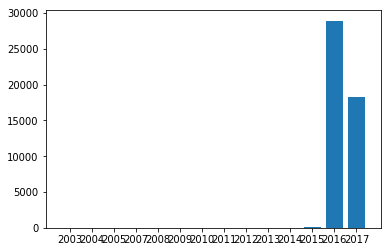

In [65]:
inspect_yearly_distribution(data_2)


100%|██████████| 1236/1236 [00:00<00:00, 675724.68it/s]

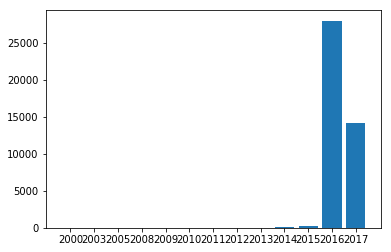

In [70]:
inspect_yearly_distribution(data_3)

In [71]:
sets = [data_1, data_2, data_3]
total_len = 0
for data in sets:
    total_len += sum([int(date[:4])==2016 for date in data.date])

In [73]:
total_len/12, total_len/12/4, total_len/365

(7117.083333333333, 1779.2708333333333, 233.986301369863)

We have roughly:
    
    7.1k articles per month
    
    1.8k articles per week
    
    0.23k articles per day